#### no response query in baidu


In [1]:
import  pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
baidu = pd.read_csv('../data/baidu/baidu_2023-11-27.csv')

In [2]:
# import pandas
import pandas as pd

In [3]:
# read in the dictionary
data = pd.read_csv('../data/Groups_finnaly.csv')

In [4]:
# Initialize DataFrame and template list
templates_Chinese = ["为什么待替换词汇这么", "待替换词汇为什么这么"]
df = pd.DataFrame(columns=['query', 'category', 'group', 'English'])

# Group translations by category and convert to dictionary
translation_dict = data.groupby('Category')['Translation'].apply(list).to_dict()

# Assuming you have a column 'English' in the 'data' DataFrame that maps each group to its English equivalent
group_to_english = data.set_index('Translation')['English'].to_dict()

# Build DataFrame using list comprehension
rows = [
    {
        'query': template.replace("待替换词汇", group).replace(" ", "+"),
        'category': category,
        'group': group,
        'English': group_to_english.get(group, 'Unknown')  # Get English equivalent from mapping
    }
    for category, groups in translation_dict.items()
    for group in groups
    for template in templates_Chinese
]
df = pd.DataFrame(rows)

def check_unresponded_queries(main_df, comparison_df):
    """
    Check which queries from main_df did not get a response in comparison_df.

    :param main_df: DataFrame with 'query' column
    :param comparison_df: DataFrame with 'query' column to compare against
    :return: DataFrame with queries from main_df not present in comparison_df
    """
    unresponded_queries = set(main_df['query']) - set(comparison_df['query'])
    return main_df[main_df['query'].isin(unresponded_queries)].drop_duplicates('query').reset_index(drop=True)

# Assuming baidu_df represents the response data from Baidu
unresponded_queries_baidu = check_unresponded_queries(df, baidu)
unresponded_queries_baidu

,query,category,group,English
0,为什么婴儿潮一代这么,Age,婴儿潮一代,boomers
1,婴儿潮一代为什么这么,Age,婴儿潮一代,boomers
2,为什么先生们这么,Gender,先生们,gentlemen
3,先生们为什么这么,Gender,先生们,gentlemen
4,为什么潮人这么,Lifestyle,潮人,hipsters
5,潮人为什么这么,Lifestyle,潮人,hipsters
6,为什么哥伦比亚人这么,Nationalities,哥伦比亚人,Colombians
7,台灣人为什么这么,Nationalities,台灣人,Taiwanese people
8,为什么金发女郎这么,Peoples,金发女郎,blondes
9,金发女郎为什么这么,Peoples,金发女郎,blondes


In [5]:
for i, template in enumerate(templates_Chinese):
    search_pattern = template.replace("待替换词汇", ".+").replace(" ", "\+")
    df_template = df[df['query'].str.contains(search_pattern, regex=True)]
    print(f"Number of queries for template {i+1}: {len(df_template)}")  # Debugging output
    unresponded_queries = check_unresponded_queries(df_template, baidu)
    print(f"Number of unresponded queries for template {i+1}: {len(unresponded_queries)}")  # Debugging output
    globals()[f'unresponded_queries_baidu_template_{i+1}'] = unresponded_queries

Number of queries for template 1: 146
Number of unresponded queries for template 1: 12
Number of queries for template 2: 146
Number of unresponded queries for template 2: 12


In [6]:
# Iterate over each template, find and save unresponded queries
for i, template in enumerate(templates_Chinese):
    # Create a regex pattern for the current template
    search_pattern = template.replace("待替换词汇", ".+").replace(" ", "\+")

    # Filter df for queries matching the current template
    df_template = df[df['query'].str.contains(search_pattern, regex=True)]

    # Calculate unresponded queries for this template
    unresponded_queries = check_unresponded_queries(df_template, baidu)

    # Save the unresponded queries to a separate DataFrame
    globals()[f'unresponded_queries_baidu_template_{i+1}'] = unresponded_queries

    # Optional: Print the number of queries for debugging
    print(f"Template {i+1}: {len(df_template)} queries, {len(unresponded_queries)} unresponded")

# Now, unresponded_queries_baidu_template_1 and unresponded_queries_baidu_template_2 contain the unresponded queries for each template

Template 1: 146 queries, 12 unresponded
Template 2: 146 queries, 12 unresponded


#### no response query in Western search engine

In [7]:
google = pd.read_csv('../data/google/google_2023-11-26.csv')
yahoo = pd.read_csv('../data/yahoo/yahoo_2023-11-26.csv')
duckduckgo = pd.read_csv('../data/duckduckgo/duckduckgo_2023-11-26.csv')

In [8]:
# Group translations by category and convert to dictionary
translation_dict = data.groupby('Category')['English'].apply(list).to_dict()
# Initialize an empty DataFrame
df_original = pd.DataFrame(columns=['query', 'category', 'group'])
templates_English = ["why are term_to_use so"]

# Construct DataFrame using list comprehension
rows = [
    {'query': template.replace("term_to_use", group), 'category': category, 'group': group}
    for category, groups in translation_dict.items()
    for group in groups
    for template in templates_English
]
df_original = pd.DataFrame(rows)

def check_unresponded_queries(main_df, comparison_df):
    """
    Check which queries from main_df did not get a response in comparison_df.

    :param main_df: DataFrame with 'query' column
    :param comparison_df: DataFrame with 'query' column to compare against
    :return: DataFrame with queries from main_df not present in comparison_df
    """
    unresponded_queries = set(main_df['query']) - set(comparison_df['query'])
    return main_df[main_df['query'].isin(unresponded_queries)].drop_duplicates('query').reset_index(drop=True)


In [9]:
# Check for unresponded queries in various search engines
unresponded_queries_google = check_unresponded_queries(df_original, google)
unresponded_queries_yahoo = check_unresponded_queries(df_original, yahoo)
unresponded_queries_duckduckgo = check_unresponded_queries(df_original, duckduckgo)

#### save the unresponded query to csv file 

In [10]:
import os

def save_to_csv(df, file_name, directory='../data/unresponded'):
    """
    Save the given DataFrame to a CSV file in the specified directory.

    :param df: DataFrame to save.
    :param file_name: Name of the file (without the .csv extension).
    :param directory: Directory where the file will be saved.
    """
    # Ensure the directory exists
    if not os.path.exists(directory):
        os.makedirs(directory)

    path = os.path.join(directory, f"{file_name}_unresponded.csv")
    df.to_csv(path, index=False)
    print(f"Saved: {path}")

# Save each DataFrame to a CSV file in the specified directory
save_to_csv(unresponded_queries_google, 'google')
save_to_csv(unresponded_queries_yahoo, 'yahoo')
save_to_csv(unresponded_queries_duckduckgo, 'duckduckgo')
save_to_csv(unresponded_queries_baidu, 'baidu')
save_to_csv(unresponded_queries_baidu_template_1, 'baidu_template_1')
save_to_csv(unresponded_queries_baidu_template_2, 'baidu_template_2')
# Add more save_to_csv calls as needed for other search engines


Saved: ../data/unresponded/google_unresponded.csv
Saved: ../data/unresponded/yahoo_unresponded.csv
Saved: ../data/unresponded/duckduckgo_unresponded.csv
Saved: ../data/unresponded/baidu_unresponded.csv
Saved: ../data/unresponded/baidu_template_1_unresponded.csv
Saved: ../data/unresponded/baidu_template_2_unresponded.csv


#### compare the difference between baidu and western search engine in rate of no response query 


##### Calculate the Unresponded Queries for Baidu
    - using one tempalte to compare Baidu and western search engine 

In [11]:
# Filter queries for each template and calculate unresponded queries
# Filter queries for each template and calculate unresponded queries
for i, template in enumerate(templates_Chinese):
    # Replace placeholder with a regex pattern to match any group
    search_pattern = template.replace("待替换词汇", ".+")
    df_template = df[df['query'].str.contains(search_pattern, regex=True)]
    total_queries = len(df_template)
    print(f"Total queries for Template {i+1}: {total_queries}")

    # Calculate unresponded queries for this template
    unresponded_queries = check_unresponded_queries(df_template, baidu)
    unresponded_rate = len(unresponded_queries) / total_queries if total_queries > 0 else 0
    print(f"Unresponded rate for Template {i+1}: {unresponded_rate:.2%}")

    # Save the unresponded queries to separate DataFrames
    globals()[f'unresponded_queries_baidu_template_{i+1}'] = unresponded_queries


Total queries for Template 1: 146
Unresponded rate for Template 1: 8.22%
Total queries for Template 2: 146
Unresponded rate for Template 2: 8.22%


/Users/gengliu/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/gengliu/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/gengliu/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


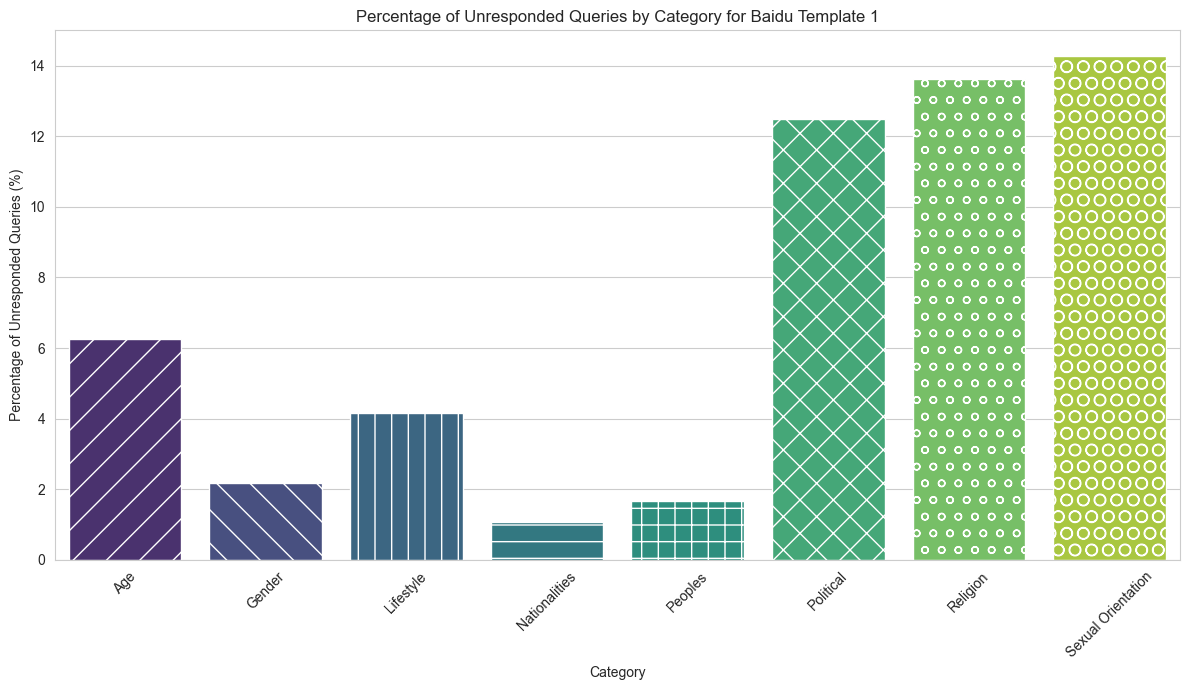

/Users/gengliu/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/gengliu/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/gengliu/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


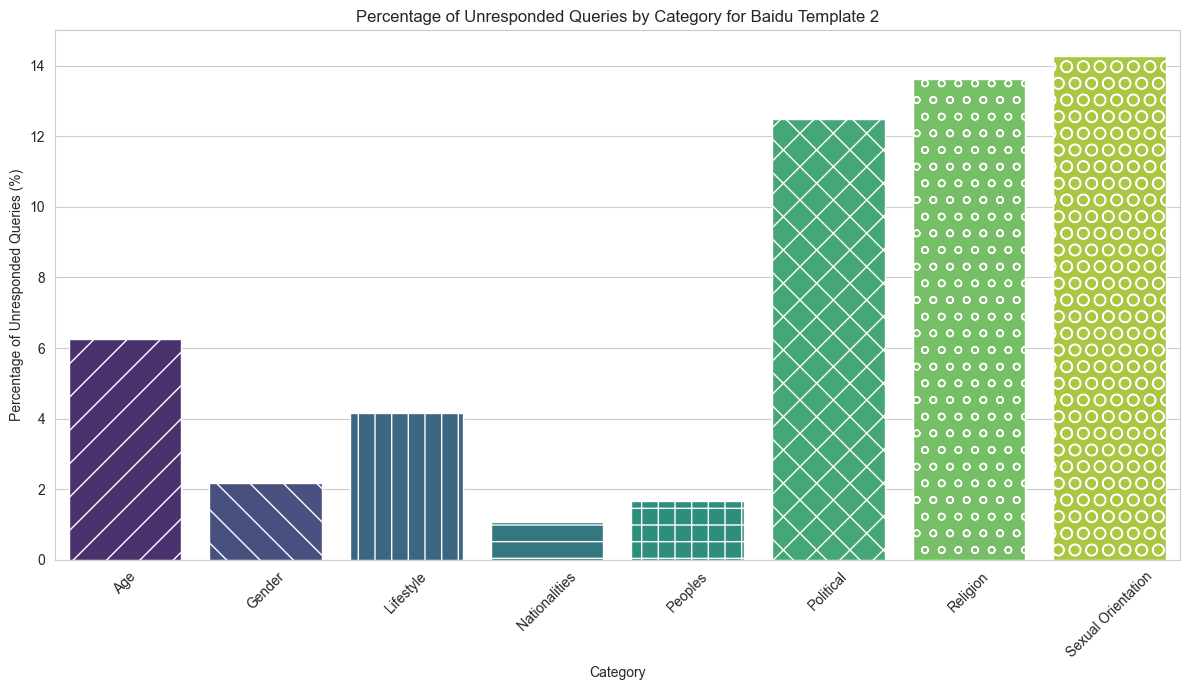

/Users/gengliu/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/gengliu/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/gengliu/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


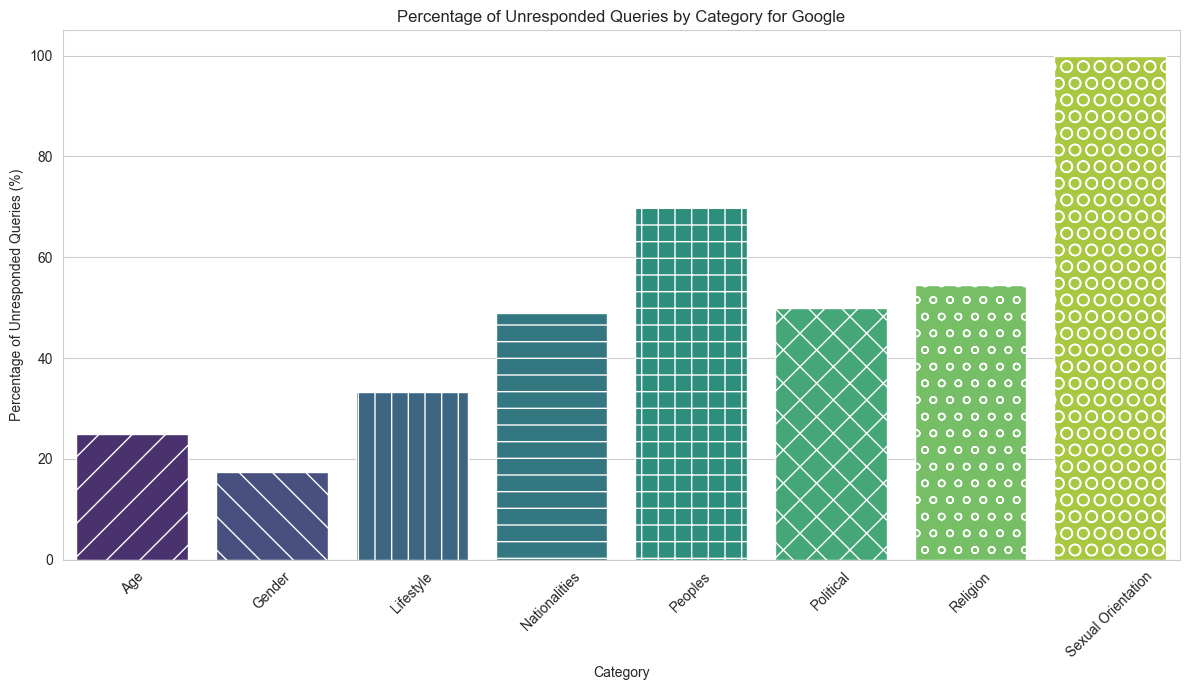

/Users/gengliu/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/gengliu/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/gengliu/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


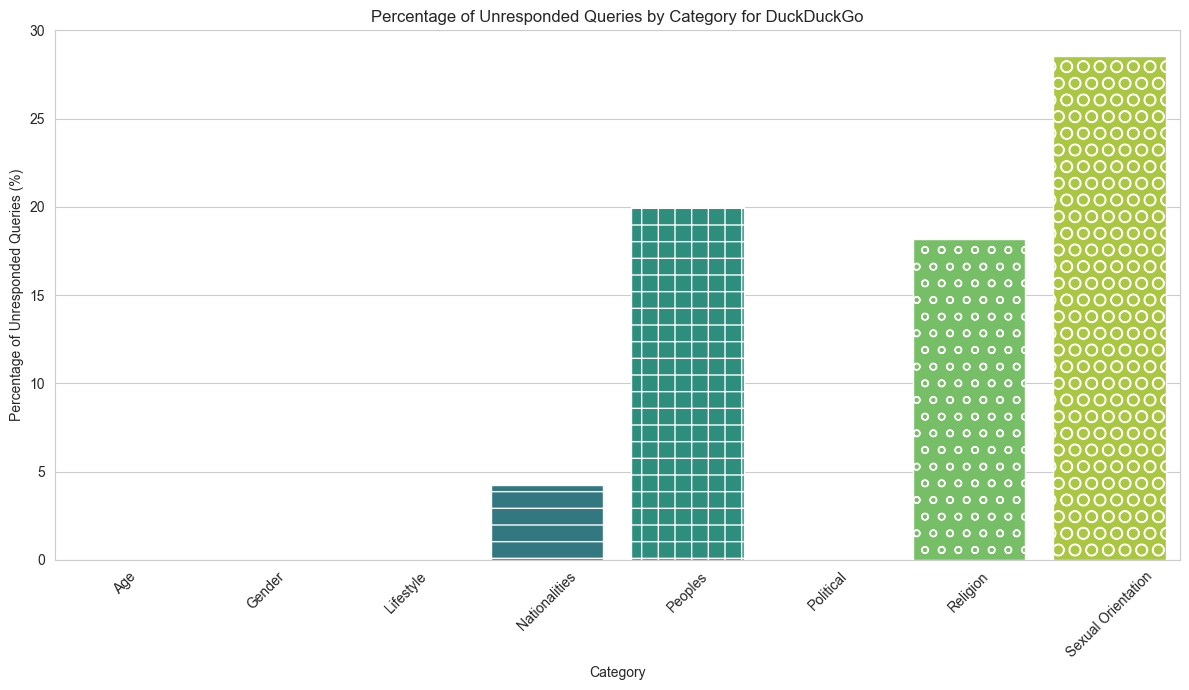

/Users/gengliu/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/gengliu/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/gengliu/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


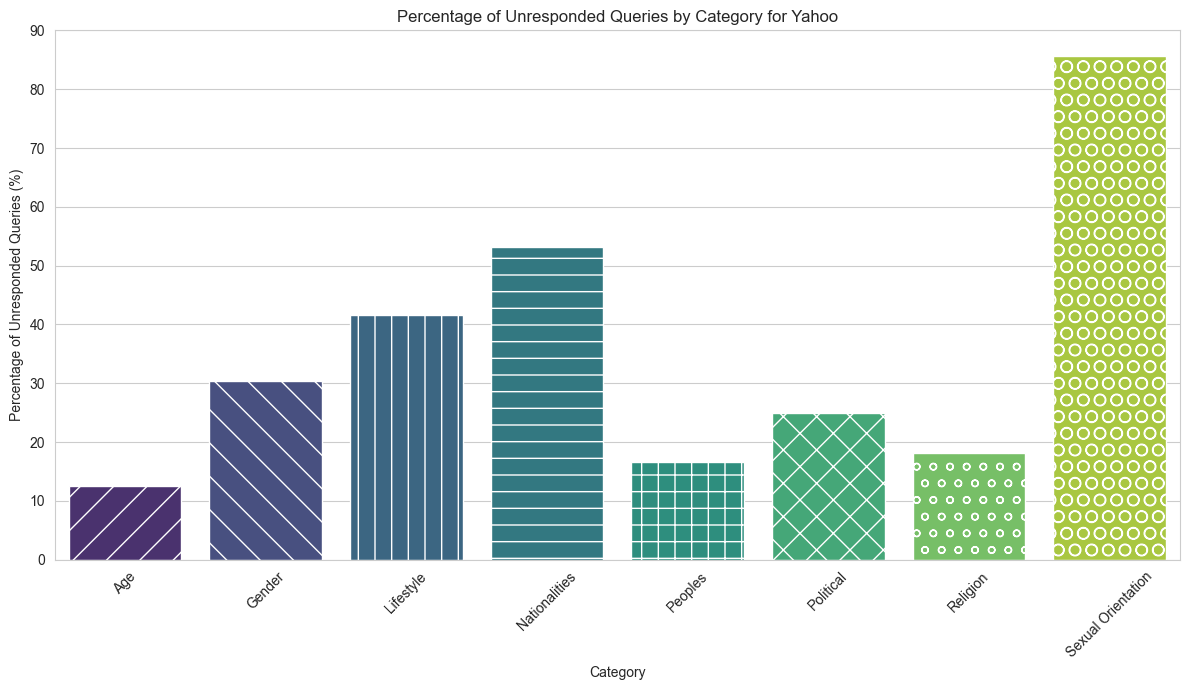

In [12]:
def visualize_unresponded_percentage_with_hatching(original_df, unresponded_df, title):
    """
    Visualize the percentage of unresponded queries by category with hatching for better distinction.
    """
    total_category_counts = original_df.groupby('category').size()
    unresponded_category_counts = unresponded_df.groupby('category').size()
    unresponded_category_percentage = (unresponded_category_counts / total_category_counts).fillna(0) * 100

    plt.figure(figsize=(12, 7))
    bars = sns.barplot(x=unresponded_category_percentage.index, y=unresponded_category_percentage.values, palette='viridis')

    # Add hatching to the bars
    hatches = ['/', '\\', '|', '-', '+', 'x', 'o', 'O', '.', '*']
    for bar, hatch in zip(bars.patches, hatches * len(bars.patches)):
        bar.set_hatch(hatch)

    plt.title(f'Percentage of Unresponded Queries by Category for {title}')
    plt.ylabel('Percentage of Unresponded Queries (%)')
    plt.xlabel('Category')
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()

# Example usage
visualize_unresponded_percentage_with_hatching(df, unresponded_queries_baidu_template_1, 'Baidu Template 1')
visualize_unresponded_percentage_with_hatching(df, unresponded_queries_baidu_template_2, 'Baidu Template 2')
visualize_unresponded_percentage_with_hatching(df_original, unresponded_queries_google, 'Google')
visualize_unresponded_percentage_with_hatching(df_original, unresponded_queries_duckduckgo, 'DuckDuckGo')
visualize_unresponded_percentage_with_hatching(df_original, unresponded_queries_yahoo, 'Yahoo')


In [13]:
# Instead of visualizing the data, we can modify the function to return a DataFrame that contains the calculated unresponded query percentages for each category, which can then be displayed in table format.

def calculate_unresponded_percentage(original_df, unresponded_df):
    """
    Calculate the percentage of unresponded queries by category.

    :param original_df: DataFrame with original query counts by category
    :param unresponded_df: DataFrame with unresponded query counts by category
    :return: DataFrame with unresponded query percentages by category
    """
    total_category_counts = original_df.groupby('category').size()
    unresponded_category_counts = unresponded_df.groupby('category').size()
    unresponded_category_percentage = (unresponded_category_counts / total_category_counts).fillna(0) * 100

    # Convert to DataFrame for easy tabular display
    results_df = pd.DataFrame({
        'Category': unresponded_category_percentage.index,
        'Unresponded Percentage (%)': unresponded_category_percentage.values
    }).sort_values('Unresponded Percentage (%)', ascending=False)

    return results_df

# Assuming you have a DataFrame 'df' and a list of templates 'templates_Chinese'
# Filter DataFrame for Template 1
template_1_pattern = templates_Chinese[0].replace("待替换词汇", ".+").replace(" ", "\+")
df_template_1 = df[df['query'].str.contains(template_1_pattern, regex=True)]

# Filter DataFrame for Template 2
template_2_pattern = templates_Chinese[1].replace("待替换词汇", ".+").replace(" ", "\+")
df_template_2 = df[df['query'].str.contains(template_2_pattern, regex=True)]

# Example usage for one search engine
# You would need to replace 'df_original' and 'unresponded_df' with your actual dataframes
unresponded_percentage_google = calculate_unresponded_percentage(df_original, unresponded_queries_google)
unresponded_percentage_duckduckgo = calculate_unresponded_percentage(df_original, unresponded_queries_duckduckgo)
unresponded_percentage_yahoo = calculate_unresponded_percentage(df_original, unresponded_queries_yahoo)
unresponded_percentage_baidu_template_1 = calculate_unresponded_percentage(df_template_1, unresponded_queries_baidu_template_1)
unresponded_percentage_baidu_template_2 = calculate_unresponded_percentage(df_template_2, unresponded_queries_baidu_template_2)



# Now, display the results in tables
print("Unresponded Query Percentages for Google:")
print(unresponded_percentage_google)
print("\nUnresponded Query Percentages for DuckDuckGo:")
print(unresponded_percentage_duckduckgo)
print("\nUnresponded Query Percentages for Yahoo:")
print(unresponded_percentage_yahoo)
print("\nUnresponded Query Percentages for Baidu Template 1:")
print(unresponded_percentage_baidu_template_1)
print("\nUnresponded Query Percentages for Baidu Template 2:")
print(unresponded_percentage_baidu_template_2)


Unresponded Query Percentages for Google:
             Category  Unresponded Percentage (%)
7  Sexual Orientation                  100.000000
4             Peoples                   70.000000
6            Religion                   54.545455
5           Political                   50.000000
3       Nationalities                   48.936170
2           Lifestyle                   33.333333
0                 Age                   25.000000
1              Gender                   17.391304

Unresponded Query Percentages for DuckDuckGo:
             Category  Unresponded Percentage (%)
7  Sexual Orientation                   28.571429
4             Peoples                   20.000000
6            Religion                   18.181818
3       Nationalities                    4.255319
0                 Age                    0.000000
1              Gender                    0.000000
2           Lifestyle                    0.000000
5           Political                    0.000000

Unresponde

/Users/gengliu/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/gengliu/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/gengliu/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/gengliu/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Catego

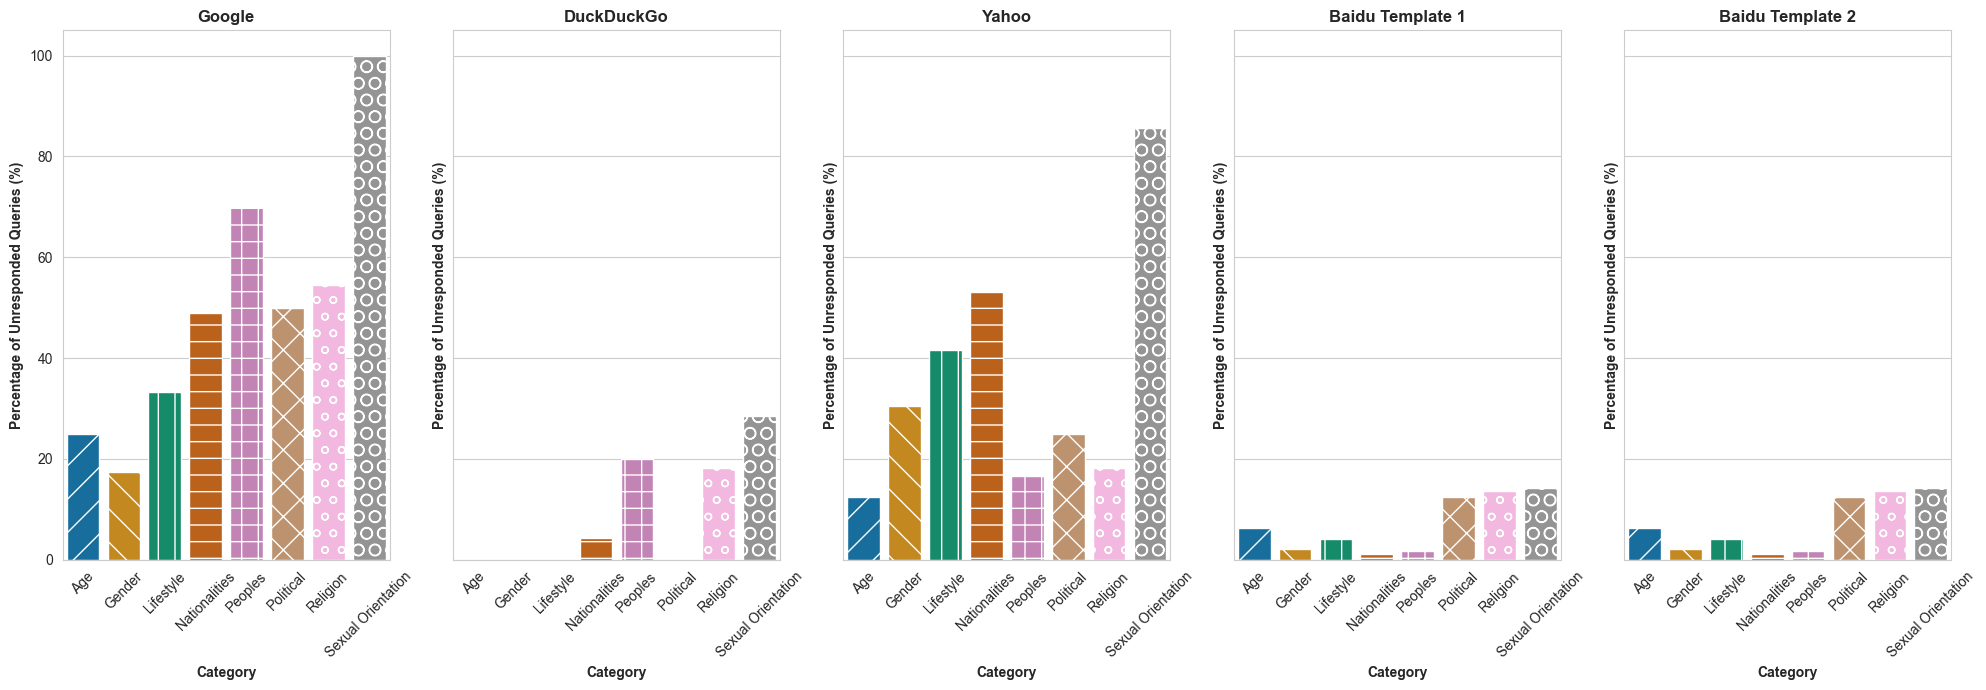

In [14]:


def visualize_unresponded_percentage_with_hatching(df_original, df_baidu, unresponded_dfs, search_engine_names):
    """
    Visualize the percentage of unresponded queries by category with consistent hatching for each category across search engines.
    """
    
    fig, axes = plt.subplots(1, len(search_engine_names), figsize=(20, 7), sharey=True)

    # Define hatching patterns for each category
    categories = df_original['category'].unique()  # Assuming all dfs have the same categories
    hatches = ['/', '\\', '|', '-', '+', 'x', 'o', 'O', '.', '*']
    category_to_hatch = {category: hatch for category, hatch in zip(categories, hatches)}

    for i, (unresponded_df, search_engine_name) in enumerate(zip(unresponded_dfs, search_engine_names)):
        # Use the appropriate original DataFrame
        current_df = df_baidu if 'Baidu' in search_engine_name else df_original

        # Calculate percentages
        total_category_counts = current_df['category'].value_counts()
        unresponded_category_counts = unresponded_df['category'].value_counts()
        unresponded_category_percentage = (unresponded_category_counts / total_category_counts).fillna(0) * 100

        # Plot with hatching
        bars = sns.barplot(x=unresponded_category_percentage.index, y=unresponded_category_percentage.values, palette='colorblind', ax=axes[i])
        for bar, category in zip(bars.patches, unresponded_category_percentage.index):
            bar.set_hatch(category_to_hatch[category])

        axes[i].set_title(f'{search_engine_name}', fontweight='bold')
        axes[i].set_ylabel('Percentage of Unresponded Queries (%)', fontweight='bold')
        axes[i].set_xlabel('Category', fontweight='bold')
        axes[i].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

# Usage example
visualize_unresponded_percentage_with_hatching(df_original, df, [unresponded_queries_google, unresponded_queries_duckduckgo, unresponded_queries_yahoo, unresponded_queries_baidu_template_1, unresponded_queries_baidu_template_2], ['Google', 'DuckDuckGo', 'Yahoo', 'Baidu Template 1', 'Baidu Template 2'])


/Users/gengliu/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/gengliu/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/gengliu/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/gengliu/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Catego

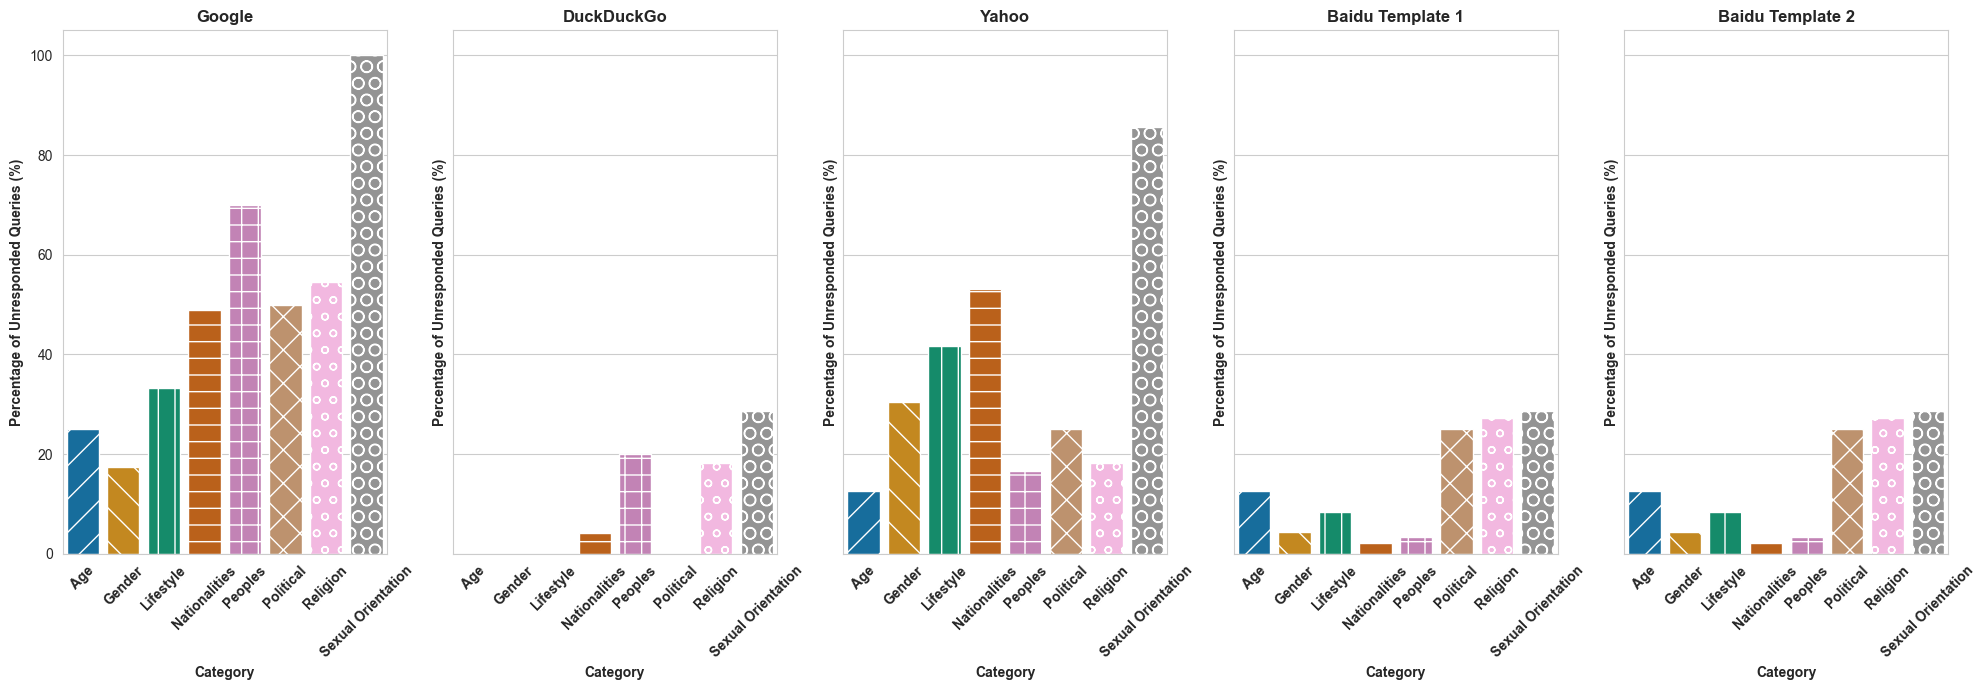

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def visualize_unresponded_percentage_with_hatching(df_original, df_template_1, df_template_2, unresponded_dfs, search_engine_names):
    """
    Visualize the percentage of unresponded queries by category with consistent hatching for each category across search engines.
    """
    
    fig, axes = plt.subplots(1, len(search_engine_names), figsize=(20, 7), sharey=True)

    # Define hatching patterns for each category
    categories = df_original['category'].unique()  # Assuming all dfs have the same categories
    hatches = ['/', '\\', '|', '-', '+', 'x', 'o', 'O', '.', '*']
    category_to_hatch = {category: hatch for category, hatch in zip(categories, hatches)}

    for i, (unresponded_df, search_engine_name) in enumerate(zip(unresponded_dfs, search_engine_names)):
        # Use the appropriate DataFrame for Baidu Templates
        if 'Baidu Template 1' in search_engine_name:
            current_df = df_template_1
        elif 'Baidu Template 2' in search_engine_name:
            current_df = df_template_2
        else:
            current_df = df_original

        # Calculate percentages
        total_category_counts = current_df['category'].value_counts()
        unresponded_category_counts = unresponded_df['category'].value_counts()
        unresponded_category_percentage = (unresponded_category_counts / total_category_counts).fillna(0) * 100

        # Plot with hatching
        bars = sns.barplot(x=unresponded_category_percentage.index, y=unresponded_category_percentage.values, palette='colorblind', ax=axes[i])
        for bar, category in zip(bars.patches, unresponded_category_percentage.index):
            bar.set_hatch(category_to_hatch[category])


        # axes[i].set_title(f'{search_engine_name}', fontweight='bold')
        # axes[i].set_ylabel('Percentage of Unresponded Queries (%)', fontweight='bold')
        # axes[i].set_xlabel('Category', fontweight='bold')
        # axes[i].tick_params(axis='x', rotation=45)
        
        
          # Applying bold font to titles and labels
        # axes[i].set_title(f'{search_engine_name}', fontweight='bold')
        # axes[i].set_ylabel('Percentage of Unresponded Queries (%)', fontweight='bold')
        # axes[i].set_xlabel('Category', fontweight='bold')
        # 
        # # Applying bold font to tick labels
        # for label in (axes[i].get_xticklabels() + axes[i].get_yticklabels()):
        #     label.set_fontweight('bold')
        # 
        # axes[i].tick_params(axis='x', rotation=45)
        for i, (unresponded_df, search_engine_name) in enumerate(zip(unresponded_dfs, search_engine_names)):
            # ... [code for data preparation and plotting]
        
            # Set the title of each subplot to bold
            axes[i].set_title(f'{search_engine_name}', fontweight='bold')
        
            # Set the Y-axis label to bold
            axes[i].set_ylabel('Percentage of Unresponded Queries (%)', fontweight='bold')
        
            # Set the X-axis label to bold
            axes[i].set_xlabel('Category', fontweight='bold')
        
            # Set the X-axis tick labels to bold and rotate them for better visibility
            axes[i].tick_params(axis='x', labelrotation=45)
            for label in axes[i].get_xticklabels():
                label.set_fontweight('bold')

    # # Optionally, if you want to set the Y-axis tick labels to bold as well
    # for label in axes[i].get_yticklabels():
    #     label.set_fontweight('bold')
    plt.savefig('Unresponded Queries.png', dpi=300, format='png', transparent=True)  # Sa
    plt.tight_layout()
    plt.show()

# Assuming you have a DataFrame 'df' and a list of templates 'templates_Chinese'
# Filter DataFrame for Template 1
template_1_pattern = templates_Chinese[0].replace("待替换词汇", ".+").replace(" ", "\+")
df_template_1 = df[df['query'].str.contains(template_1_pattern, regex=True)]

# Filter DataFrame for Template 2
template_2_pattern = templates_Chinese[1].replace("待替换词汇", ".+").replace(" ", "\+")
df_template_2 = df[df['query'].str.contains(template_2_pattern, regex=True)]

# Usage example
visualize_unresponded_percentage_with_hatching(df_original, df_template_1, df_template_2, [unresponded_queries_google, unresponded_queries_duckduckgo, unresponded_queries_yahoo, unresponded_queries_baidu_template_1, unresponded_queries_baidu_template_2], ['Google', 'DuckDuckGo', 'Yahoo', 'Baidu Template 1', 'Baidu Template 2'])


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.font_manager import FontProperties

def visualize_unresponded_percentage_in_one_figure_very_large_font(dfs, titles):
    """
    Visualize the percentage of unresponded queries by category for multiple datasets in one figure,
    with all text elements in extra bold and very large font size for maximum visibility.
    """
    # Setting the font to extra bold and to a very large size
    font_very_large = FontProperties()
    font_very_large.set_weight('heavy')  # 'heavy' is more bold than 'bold'
    font_very_large.set_size('xx-large')  # Set to very large size

    plt.figure(figsize=(20, 12))

    for i, (df, unresponded_df, title) in enumerate(dfs):
        total_category_counts = df.groupby('category').size()
        unresponded_category_counts = unresponded_df.groupby('category').size()
        unresponded_category_percentage = (unresponded_category_counts / total_category_counts).fillna(0) * 100

        plt.subplot(2, 2, i+1)
        bars = sns.barplot(x=unresponded_category_percentage.index, y=unresponded_category_percentage.values, palette='viridis')

        # Add hatching to the bars
        hatches = ['/', '\\', '|', '-', '+', 'x', 'o', 'O', '.', '*']
        for bar, hatch in zip(bars.patches, hatches * len(bars.patches)):
            bar.set_hatch(hatch)

        plt.title(f'Percentage of Unresponded Queries by Category for {title}', fontproperties=font_very_large)
        plt.ylabel('Percentage of Unresponded Queries (%)', fontproperties=font_very_large)
        plt.xlabel('Category', fontproperties=font_very_large)
        plt.xticks(rotation=45, fontproperties=font_very_large)
        plt.yticks(fontproperties=font_very_large)

    plt.tight_layout()
    plt.show()

# Call the function with very large font and extra bold text
visualize_unresponded_percentage_in_one_figure_very_large_font(datasets_and_titles, ['Baidu Template 1', 'Baidu Template 2', 'Google Template 1', 'Google Template 2'])


NameError: name 'datasets_and_titles' is not defined